In [46]:
# importing needed tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [47]:
# Load Walmart Sales data
# Source: https://www.kaggle.com/datasets/yasserh/walmart-dataset?resource=download

sales_data = pd.read_csv("Resources/Walmart.csv")
sales_data.head()
sales_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [48]:
# Explore the dataset
print(len(sales_data))
print(sales_data.dtypes)
sales_data.describe()

6435
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [49]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')
print(sales_data.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


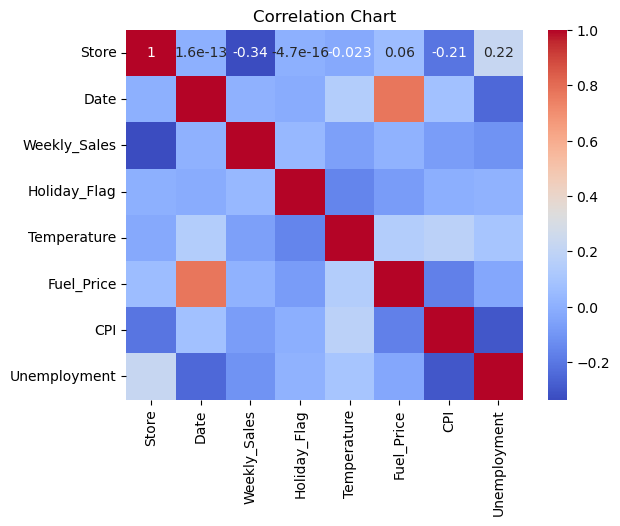

In [50]:
corr_matrix = sales_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Chart')
plt.show()

In [51]:
# searching the data 
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')
print(sales_data.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


In [52]:
# creating a new dataset 
holiday_sales_df = sales_data

In [53]:
# verifying dataset 
holiday_sales_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [54]:
# veiwing dataset 
holiday_sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [55]:
# filtering data to include only holiday sales 
holiday_sales_df = holiday_sales_df[holiday_sales_df['Holiday_Flag'] == 1]

In [56]:
# verifying filtered data 
holiday_sales_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424


In [57]:
# Veiwing top holiday weekly sales from top three stores 
top_stores_holiday = holiday_sales_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(3)
print(top_stores_holiday)

Store
20    22490350.81
4     22431026.24
14    21205829.98
Name: Weekly_Sales, dtype: float64


In [58]:
# Veiwing top average weelkly sales from same top three stores 
top_stores_average = sales_data.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(3) 
print(top_stores_average)

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
Name: Weekly_Sales, dtype: float64


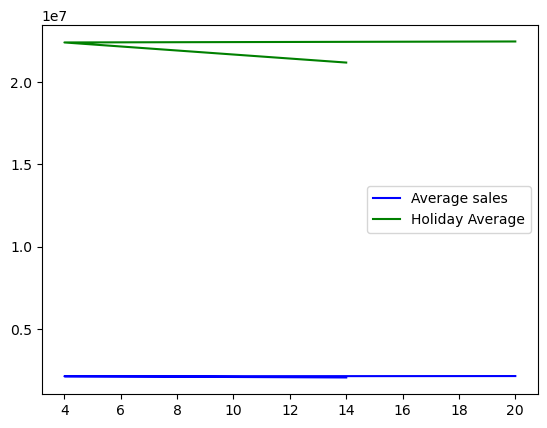

In [59]:
# showing the difference between Average holiday sales and Average weekly sales 
# Plot average sales of top three stores 
top_three_sales_avg, = plt.plot(top_stores_average, color="blue",label= "Average sales" )

# Plot holiday average sales of tope three stores 
top_three_holiday_sales, = plt.plot(top_stores_holiday, color="green",label= "Holiday Average" )

#legend chart
plt.legend(handles=[top_three_sales_avg, top_three_holiday_sales], loc="best")

#chart
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

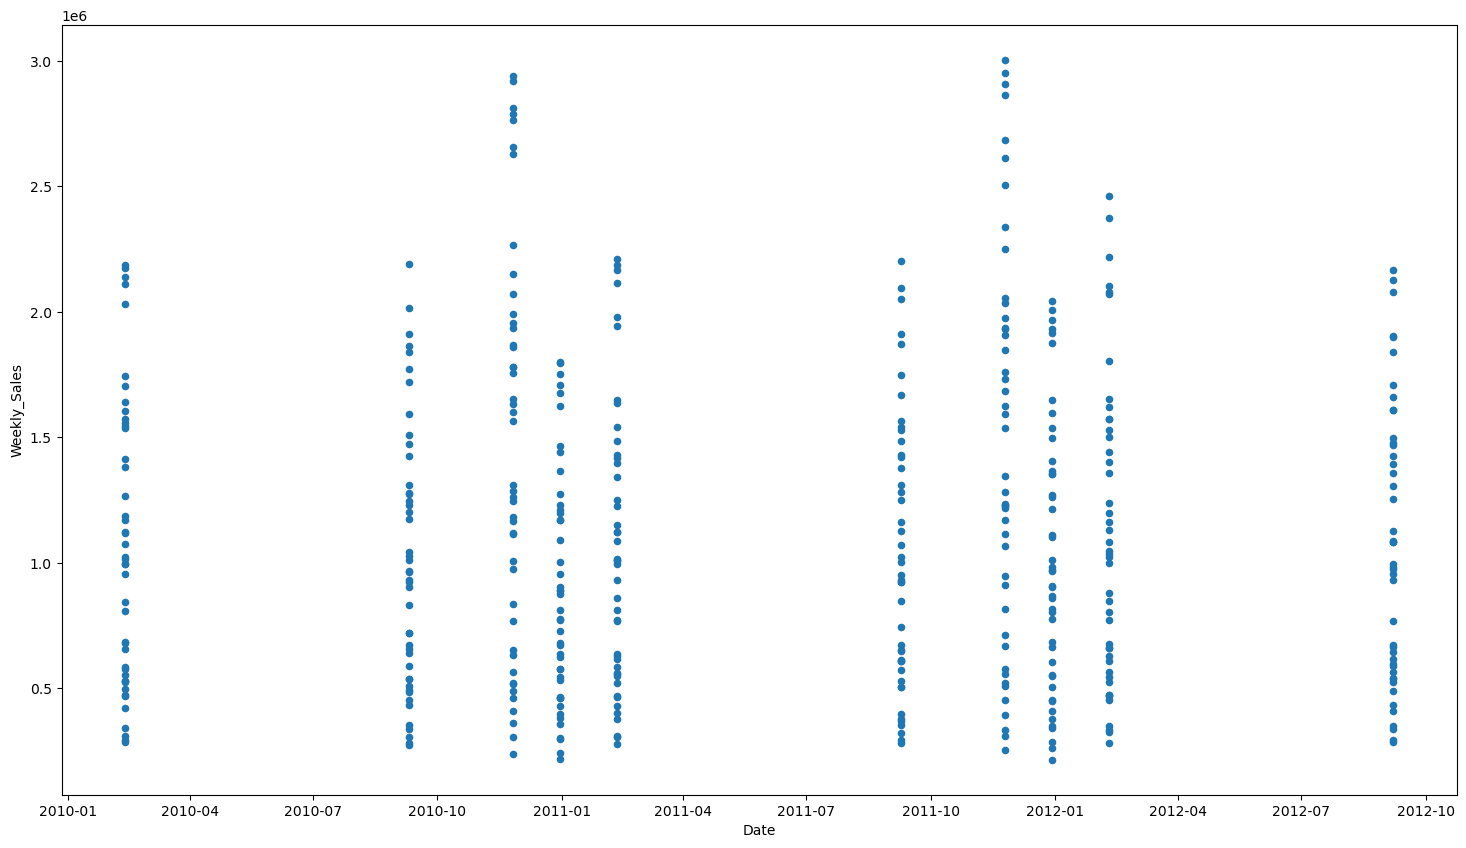

In [60]:
# viewing the top sales dates to see which holidays occurred the most sales 
# Christmas, Labor day and Superbowl are veiwed as top sales holidays 
holiday_sales_df.plot.scatter(x='Date', y='Weekly_Sales', figsize=(18,10))

In [61]:
# preparing the data to be copyied into a new dataset and changing the datetime column for ML models
holiday_sales_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [62]:
# Copied the dataset 
holiday_sales_clean = holiday_sales_df.copy()

In [63]:
# verifying copy 
holiday_sales_clean.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [64]:
# moving data from Dtae column into three seperate columns 
holiday_sales_clean.loc[:,'Year'] = holiday_sales_clean['Date'].dt.year
holiday_sales_clean.loc[:,'Month'] = holiday_sales_clean['Date'].dt.month
holiday_sales_clean.loc[:,'Day'] = holiday_sales_clean['Date'].dt.day

In [65]:
# dropping the Date colun from the dataset to git best model
holiday_sales_clean = holiday_sales_clean.drop('Date', axis=1)
holiday_sales_clean = holiday_sales_clean.drop('Temperature', axis=1)
holiday_sales_clean = holiday_sales_clean.drop('Fuel_Price', axis=1)
holiday_sales_clean = holiday_sales_clean.drop('Unemployment', axis=1)
holiday_sales_clean = holiday_sales_clean.drop('CPI', axis=1)
holiday_sales_clean = holiday_sales_clean.drop('Year', axis=1)

In [87]:
# verifying changes 
holiday_sales_clean

,Store,Weekly_Sales,Holiday_Flag,Month,Day
1,1,1641957.44,1,2,12
31,1,1507460.69,1,9,10
42,1,1955624.11,1,11,26
47,1,1367320.01,1,12,31
53,1,1649614.93,1,2,11
...,...,...,...,...,...
6375,45,746129.56,1,9,9
6386,45,1170672.94,1,11,25
6391,45,869403.63,1,12,30
6397,45,803657.12,1,2,10


In [89]:
# Creating the model 
X = holiday_sales_clean.drop(columns='Weekly_Sales')
y = holiday_sales_clean['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [91]:
# Randome Forest Regressor model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Now you can fit your model
model.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
# Predictions of sales Mean squared error. 
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 27246160034.431217
Mean Absolute Error: 118287.92160619477


In [95]:
model.score(X_test, y_test)

0.9283208892497629

In [97]:
y_test.mean()

1172695.8827433628

In [99]:
predictions_df = pd.DataFrame({'Actuals': y_test, 'Predicted': y_pred})
predictions_df

,Actuals,Predicted
2959,804362.36,9.871849e+05
4893,961685.98,1.003313e+06
941,613135.23,6.780893e+05
385,410553.88,5.727299e+05
4967,849779.14,1.018051e+06
...,...,...
4282,433565.77,4.156656e+05
3463,655811.95,8.049527e+05
3817,1650604.60,1.413511e+06
5179,510296.07,5.153484e+05
